In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.regularizers import l2




EPOCHS=10
BATCH_SIZE=128
VERBOSE=1
OPTIMIZER=tf.keras.optimizers.Adam()
VALIDATION_SPLIT=0.90

IMG_ROWS, IMG_COLS =28, 28
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
NB_CLASSES = 10

In [ ]:

model = models.Sequential()

model.add(layers.Convolution2D(20, (5,5), activation='relu', input_shape=INPUT_SHAPE))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Convolution2D(50, (5,5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Flatten())
model.add(layers.Dense(500, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(100, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation = 'softmax'))




In [ ]:
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [ ]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [ ]:
X_train, X_test = X_train/255.0, X_test/255.0

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [ ]:
Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)

In [ ]:

model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 20)        520       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 20)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 20)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 50)          25050     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 50)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 4, 4, 50)          0

In [ ]:
callbacks = [ tf.keras.callbacks.TensorBoard(log_dir='./logs')]


In [ ]:
history = model.fit(X_train, Y_train,batch_size=BATCH_SIZE, epochs=EPOCHS,verbose=VERBOSE, validation_split=VALIDATION_SPLIT, callbacks=callbacks)

Epoch 1/10
47/47 [==============================] - 22s 462ms/step - loss: 1.4185 - accuracy: 0.5219 - val_loss: 0.4720 - val_accuracy: 0.8649
Epoch 2/10
47/47 [==============================] - 19s 405ms/step - loss: 0.4420 - accuracy: 0.8626 - val_loss: 0.2110 - val_accuracy: 0.9365
Epoch 3/10
47/47 [==============================] - 18s 385ms/step - loss: 0.2667 - accuracy: 0.9192 - val_loss: 0.1602 - val_accuracy: 0.9479
Epoch 4/10
47/47 [==============================] - 19s 400ms/step - loss: 0.1982 - accuracy: 0.9413 - val_loss: 0.1192 - val_accuracy: 0.9628
Epoch 5/10
47/47 [==============================] - 18s 394ms/step - loss: 0.1493 - accuracy: 0.9555 - val_loss: 0.1031 - val_accuracy: 0.9667
Epoch 6/10
47/47 [==============================] - 18s 393ms/step - loss: 0.1298 - accuracy: 0.9613 - val_loss: 0.0908 - val_accuracy: 0.9707
Epoch 7/10
47/47 [==============================] - 18s 395ms/step - loss: 0.1170 - accuracy: 0.9653 - val_loss: 0.0927 - val_accuracy: 0.9701

In [ ]:
score= model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest Loss:", score[0])
print('Test Accuracy:', score[1])

313/313 [==============================] - 4s 12ms/step - loss: 0.0659 - accuracy: 0.9784

Test Loss: 0.06593061238527298
Test Accuracy: 0.9783999919891357


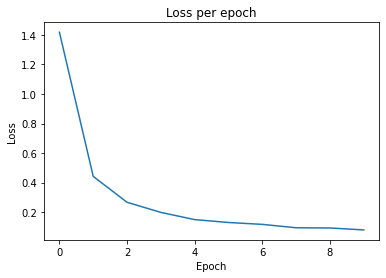

In [ ]:
plt.plot(history.history['loss'])
plt.title('Loss per epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

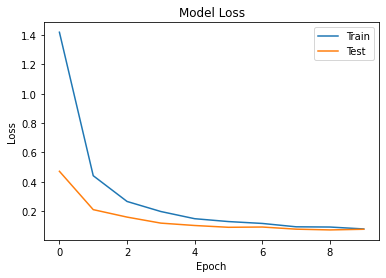

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

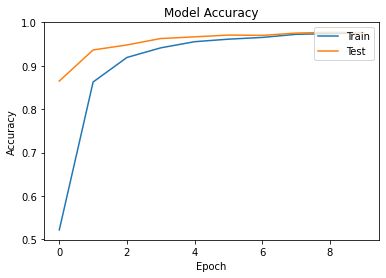

In [ ]:
plt.plot(history.history['accuracy'], label ="train_accuracy")
plt.plot(history.history['val_accuracy'], label = "test_accuracy")
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0)).round(2)

1/1 [==============================] - 0s 114ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
np.argmax(model.predict(np.expand_dims(X_test[0], axis=0)).round(2))

1/1 [==============================] - 0s 20ms/step


7

In [ ]:

Y_test = [np.argmax(label) for label in Y_test]
Y_test[0]

7

In [ ]:
y_pred = model.predict(X_test).round(2)
y_pred

313/313 [==============================] - 3s 10ms/step


array([[0.  , 0.  , 0.  , ..., 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.36, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

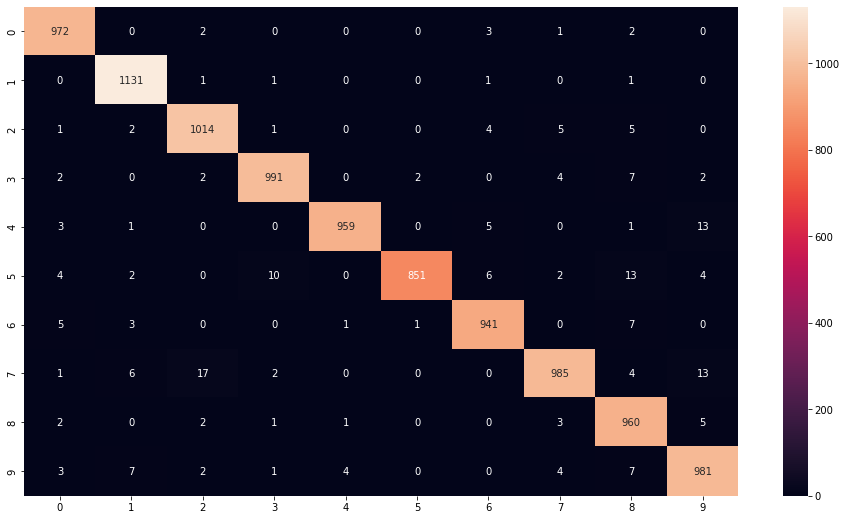

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(Y_test, y_pred_labels)

sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
y_pred_labels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,
